In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Rice_Dataset.csv')

In [ ]:
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   District             480 non-null    object 
 1   Index                480 non-null    int64  
 2   Year                 480 non-null    int64  
 3   Max_Tem              480 non-null    float64
 4   Min_Tem              480 non-null    float64
 5   Avg_Tem              480 non-null    float64
 6   Rainfall             480 non-null    float64
 7   Hm avg               480 non-null    float64
 8   SS_Avg               480 non-null    float64
 9   Soil Type            480 non-null    object 
 10  pH Level             480 non-null    float64
 11  Organic Content      480 non-null    object 
 12  Nitrogen (ppm)       480 non-null    float64
 13  Phosphorus (ppm)     480 non-null    float64
 14  Potassium (ppm)      480 non-null    int64  
 15  Aus Production M.T 

In [ ]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             Index         Year     Max_Tem     Min_Tem     Avg_Tem  \
count    480.00000   480.000000  480.000000  480.000000  480.000000   
mean   26333.73750  2018.560417   30.182646   21.274280   25.613667   
std    15525.63476     3.449682    1.410788    1.999611    1.395292   
min    11111.00000  2013.000000    6.500000    0.000000    0.000000   
25%    11111.00000  2016.000000   29.907500   20.800170   25.240000   
50%    13655.00000  2019.000000   30.355000   21.505000   25.735000   
75%    41909.00000  2022.000000   30.680000   22.124652   26.182500   
max    45698.00000  2024.000000   32.060000   26.100000   27.180000   

         Rainfall      Hm avg      SS_Avg    pH Level  Nitrogen (ppm)  \
count  480.000000  480.000000  480.000000  480.000000      480.000000   
mean     6.209354   77.316167    5.107021    7.413542        0.295458   
std      3.664586    4.638160    1.931441    0.351501        0.037564   
min      0.110000    6.500000    0.000000    6


Statistical Summary:
             Index         Year     Max_Tem     Min_Tem     Avg_Tem  \
count    480.00000   480.000000  480.000000  480.000000  480.000000   
mean   26333.73750  2018.560417   30.182646   21.274280   25.613667   
std    15525.63476     3.449682    1.410788    1.999611    1.395292   
min    11111.00000  2013.000000    6.500000    0.000000    0.000000   
25%    11111.00000  2016.000000   29.907500   20.800170   25.240000   
50%    13655.00000  2019.000000   30.355000   21.505000   25.735000   
75%    41909.00000  2022.000000   30.680000   22.124652   26.182500   
max    45698.00000  2024.000000   32.060000   26.100000   27.180000   

         Rainfall      Hm avg      SS_Avg    pH Level  Nitrogen (ppm)  \
count  480.000000  480.000000  480.000000  480.000000      480.000000   
mean     6.209354   77.316167    5.107021    7.413542        0.295458   
std      3.664586    4.638160    1.931441    0.351501        0.037564   
min      0.110000    6.500000    0.000000    6

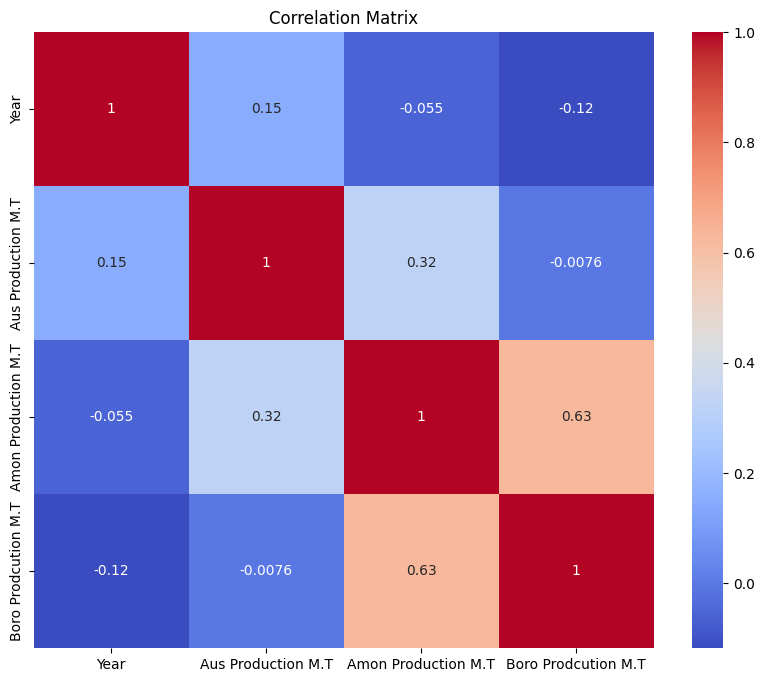

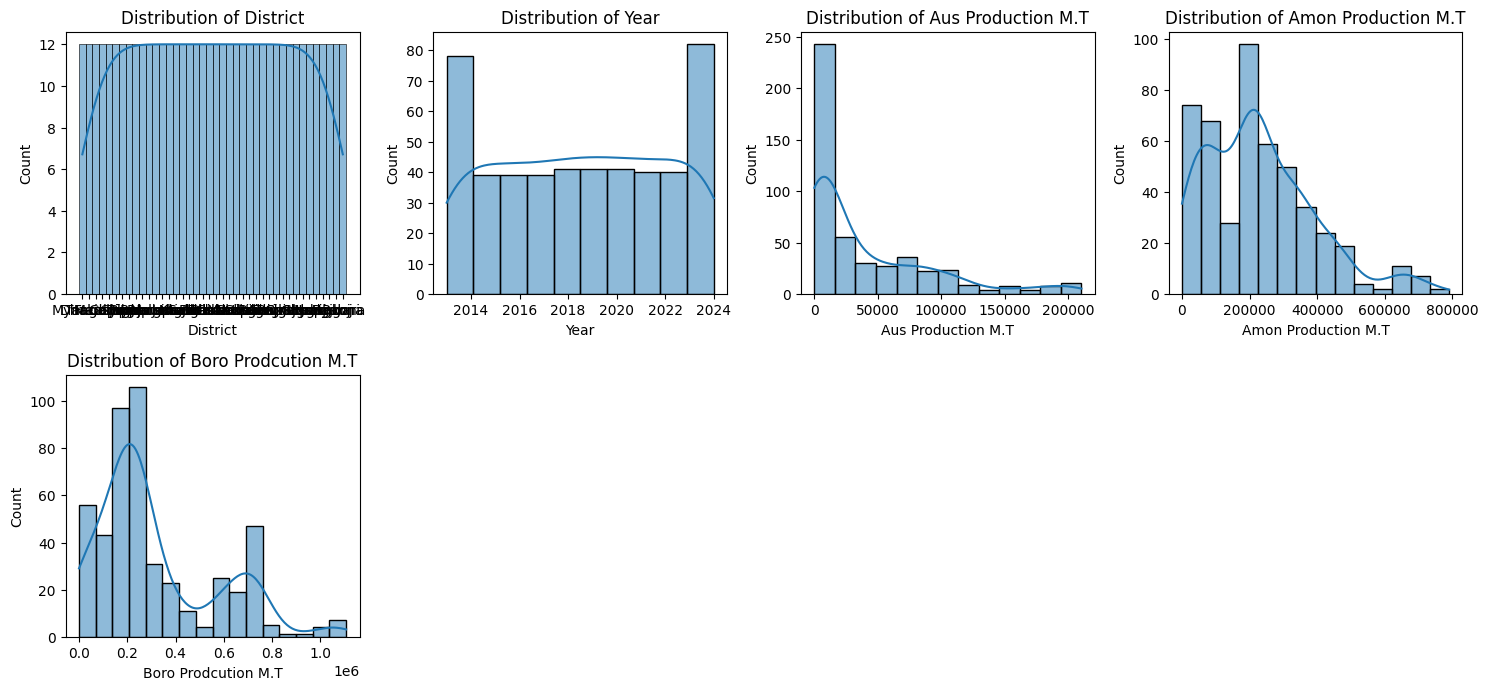

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required data
print("\nStatistical Summary:")
print(df.describe())

# Selecting specific columns for further analysis
# Get actual column names from the DataFrame
columns_of_interest = [
    'District', 'Year', 'Aus Production M.T','Amon Production M.T','Boro Prodcution M.T'
]
# Converting to numeric to ensure no errors
# Apply to_numeric to specific columns to avoid errors if some columns have non-numeric data
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
missing_columns = [col for col in columns_of_interest if col not in df.columns]
if missing_columns:
    print(f"Error: The following columns are not in the DataFrame: {missing_columns}")
# Converting to numeric to ensure no errors
# Exclude 'District' column from correlation analysis as it's non-numeric
numerical_columns_of_interest = [col for col in columns_of_interest if col in numeric_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns_of_interest].corr(), annot=True, cmap='coolwarm') # Use only numerical columns for correlation
plt.title('Correlation Matrix')
plt.show()

# Calculating the overall mean, excluding NaN values
#overall_mean = np.nanmean(df[columns_of_interest].values.flatten())
#print(f"\nOverall Mean of selected columns: {overall_mean}")

# Correlation analysis

# Distribution plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 4, i)  # Adjust subplot layout to fit all plots
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
if 'Aus Production M.T' in df.columns:
    X = df.drop(['Aus Production M.T', 'District', 'Soil Type', 'Organic Content'], axis=1)
else:
    # Handle the case where 'Grades' column is not found
    # For example, print an error message and stop execution
    print("Error: 'Aus Production M.T' column not found in the DataFrame.")
    # Or, if you have a different column representing the target variable,
    # you can use that column instead.
    # For example, if 'Grade' is the correct column name:
    # X = df.drop('Grade', axis=1)

y = df['Aus Production M.T']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Apply the preprocessor to the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

    return rmse, mae, r2

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

In [ ]:
!pip install scikit-learn==1.5.2
!pip install --upgrade xgboost
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = evaluate_model(y_test, y_pred, name)

    # Cross-validation scores
    print(f"y_train: {y_train}")
    y_train = y_train.dropna()
    cv_scores = cross_val_score(model, X_train_scaled, y_train.values, cv=5, scoring='r2')
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean CV R2 score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")


Training Linear Regression...

Linear Regression Performance Metrics:
RMSE: 61944.37
MAE: 41095.77
R2 Score: -0.15
y_train: 132     1068
228    93360
473    37653
42     15869
360        0
       ...  
106    28662
270    26286
348      219
435    88749
102    20324
Name: Aus Production M.T, Length: 384, dtype: int64
Cross-validation R2 scores: [ 0.20497069  0.24016175 -0.00043884  0.12637406  0.12283622]
Mean CV R2 score: 0.14 (+/- 0.17)

Training Random Forest...

Random Forest Performance Metrics:
RMSE: 41716.98
MAE: 26947.48
R2 Score: 0.48
y_train: 132     1068
228    93360
473    37653
42     15869
360        0
       ...  
106    28662
270    26286
348      219
435    88749
102    20324
Name: Aus Production M.T, Length: 384, dtype: int64
Cross-validation R2 scores: [0.24740295 0.29128135 0.53616579 0.25187328 0.3808354 ]
Mean CV R2 score: 0.34 (+/- 0.22)

Training SVR...

SVR Performance Metrics:
RMSE: 67237.41
MAE: 42930.29
R2 Score: -0.35
y_train: 132     1068
228    93360
473

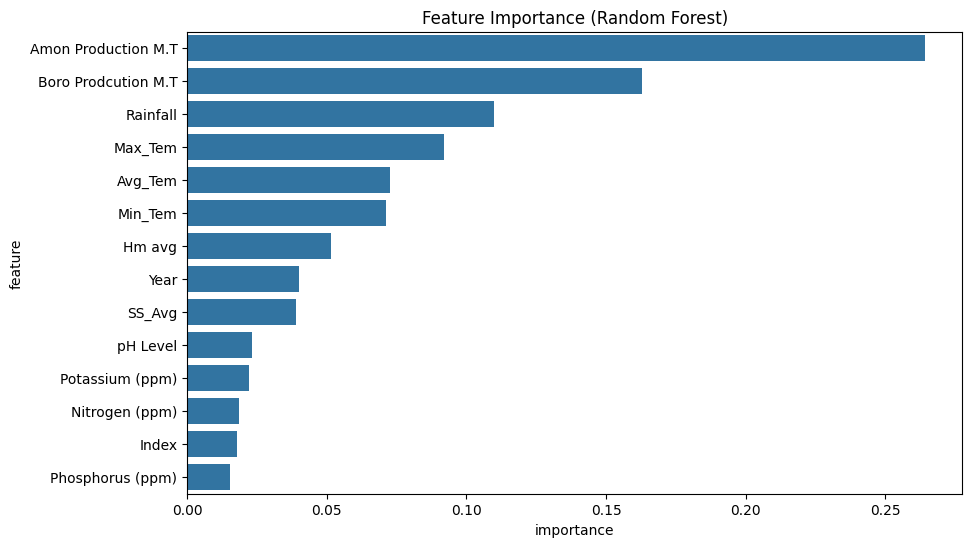

In [ ]:
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

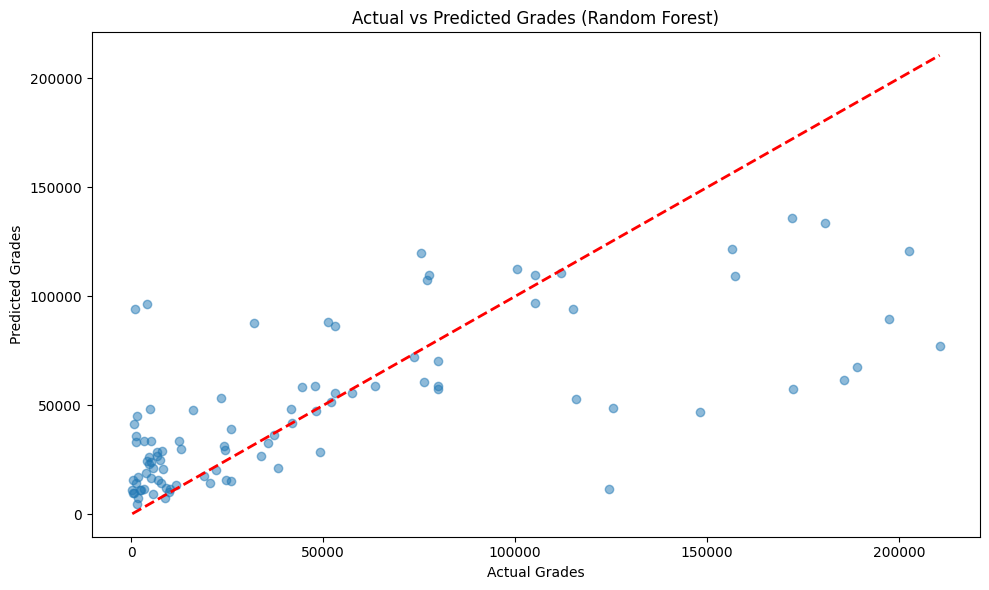

In [ ]:
best_model_name = model_names[np.argmax(r2_scores)]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title(f'Actual vs Predicted Grades ({best_model_name})')
plt.tight_layout()
plt.show()

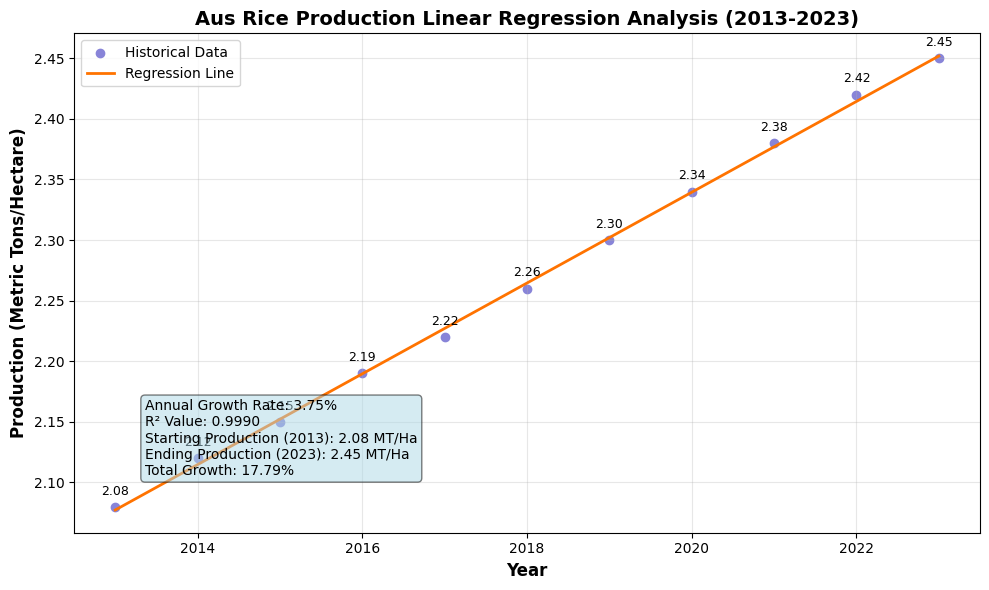

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Historical data points (Year and Production)
data = [
    {"year": 2013, "production": 2.08},
    {"year": 2014, "production": 2.12},
    {"year": 2015, "production": 2.15},
    {"year": 2016, "production": 2.19},
    {"year": 2017, "production": 2.22},
    {"year": 2018, "production": 2.26},
    {"year": 2019, "production": 2.30},
    {"year": 2020, "production": 2.34},
    {"year": 2021, "production": 2.38},
    {"year": 2022, "production": 2.42},
    {"year": 2023, "production": 2.45},
]

# Extract year and production values
years = np.array([point["year"] for point in data])
production = np.array([point["production"] for point in data])

# Calculate regression coefficients
n = len(years)
sum_x = np.sum(years)
sum_y = np.sum(production)
sum_xy = np.sum(years * production)
sum_xx = np.sum(years * years)

slope = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
intercept = (sum_y - slope * sum_x) / n

# Regression line points
regression_years = np.linspace(min(years), max(years), 100)
regression_values = slope * regression_years + intercept

# Calculate R-squared
y_mean = np.mean(production)
total_ss = np.sum((production - y_mean) ** 2)
regression_ss = np.sum((slope * years + intercept - y_mean) ** 2)
r_squared = regression_ss / total_ss

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(years, production, color="#8884d8", label="Historical Data")
plt.plot(regression_years, regression_values, color="#ff7300", label="Regression Line", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Production (Metric Tons/Hectare)", fontsize=12, fontweight="bold")
plt.title("Aus Rice Production Linear Regression Analysis (2013-2023)", fontsize=14, fontweight="bold")
plt.legend()

# Annotate data points
for i, value in enumerate(production):
    plt.text(years[i], value + 0.01, f"{value:.2f}", ha="center", fontsize=9)

# Add gridlines
plt.grid(alpha=0.3)

# Display statistical information
plt.figtext(
    0.15,
    0.2,
    f"Annual Growth Rate: {slope * 100:.2f}%\n"
    f"R² Value: {r_squared:.4f}\n"
    f"Starting Production (2013): {production[0]:.2f} MT/Ha\n"
    f"Ending Production (2023): {production[-1]:.2f} MT/Ha\n"
    f"Total Growth: {((production[-1] - production[0]) / production[0] * 100):.2f}%",
    fontsize=10,
    bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.5),
)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample dataset (Replace this with actual dataset)
data = {
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]
    'Rice_Production': [110, 115, 120, 130, 135, 140, 145, 150, 160, 165,180]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Split data into features (X) and target (Y)
X = df[['Year']]  # Feature (Year)
y = df['Rice_Production']  # Target (Rice Production)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluate both models
lr_mse = mean_squared_error(y_test, y_lr_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
lr_r2 = r2_score(y_test, y_lr_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Linear Regression MSE: {lr_mse}, R-squared: {lr_r2}')
print(f'Random Forest MSE: {rf_mse}, R-squared: {rf_r2}')

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Linear regression prediction line
plt.plot(X_test, y_lr_pred, color='red', label='Linear Regression')

# Random forest prediction line
plt.plot(X_test, y_rf_pred, color='green', label='Random Forest')

plt.xlabel('Year')
plt.ylabel('Rice Production (in tons)')
plt.title('Linear Regression vs Random Forest Regression - Rice Production in Bangladesh')
plt.legend()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-6-428ef80115b9>, line 11)

In [ ]:
import pandas as pd
import plotly.express as px

# Example dataset for Bangladesh districts
data = {
    'District': [ 'Rangamati',  'Dhaka', 'Chittagong', 'Sylhet', 'Rajshahi', 'Khulna', 'Dinajpur','Joypurhat','Khulna' ,'Rangpur', 'Nawabganj ', 'Comilla', 'Mymensingh'],
    '2026': [120,98, 100, 90, 80, 70, 60, 50, 40,90,40,75,93]  # Example rice production values
}

df1 = pd.DataFrame(data)

# Create the pie chart
fig3 = px.pie(df1, names='District', values='2026', title='Rice Production in 2026 (Bangladesh Districts)')

# Highlight specific districts (e.g., Dhaka and Chittagong)
dhaka_index = df1[df1['District'] == 'Dhaka'].index[0]
chittagong_index = df1[df1['District'] == 'Chittagong'].index[0]

# Create explode list
explode_list = [0] * len(df1)
explode_list[dhaka_index] = 0.1  # Highlight Dhaka
explode_list[chittagong_index] = 0.1  # Highlight Chittagong

# Update the chart
fig3.update_traces(hole=0.3, pull=explode_list)
fig3.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

# Show the chart
fig3.show()

In [3]:
import plotly.graph_objects as go

# Data for Dinajpur Boro Rice Forecast
data = [
    {'year': '2026', 'production': 1.8},
    {'year': '2027', 'production': 3.02},
    {'year': '2028', 'production': 2.10},
    {'year': '2029', 'production': 8.25},
    {'year': '2030', 'production': 2.3}
]

# Extract year and production values
years = [item['year'] for item in data]
productions = [item['production'] for item in data]

# Create the bar chart
fig = go.Figure()

# Add bars to the chart
fig.add_trace(go.Bar(
    x=years,
    y=productions,
    text=productions,  # Add production values as labels
    textposition='outside',  # Position labels outside the bars
    marker_color='skyblue',
    name='Production'
))

# Customize the layout
fig.update_layout(
    title='Total Yearly Forecasted Production/Area for Dinajpur District Boro Rice (2026-2030)',
    xaxis_title='Year',
    yaxis_title='Total Production/Area (Metric Tons/Hectare)',
    yaxis=dict(
        range=[0, 6],
        tickmode='linear',
        tick0=0,
        dtick=1
    ),
    template='plotly_white',
    margin=dict(t=50, r=20, b=50, l=70),
    height=600,
    width=900
)

# Add annotations for key production factors
fig.add_annotation(
    text=(
        "Key Production Factors for Dinajpur:<br>"
        "- Favorable irrigation facilities<br>"
        "- Rich alluvial soil quality<br>"
        "- Advanced farming techniques<br>"
        "- Good agricultural infrastructure<br>"
        "- Experienced farming community"
    ),
    x=0.5,
    y=-0.2,
    showarrow=False,
    xref="paper",
    yref="paper",
    align="left",
    font=dict(size=12),
    bgcolor="lightgray",
    bordercolor="black",
    borderwidth=1,
    borderpad=5
)

# Show the chart
fig.show()

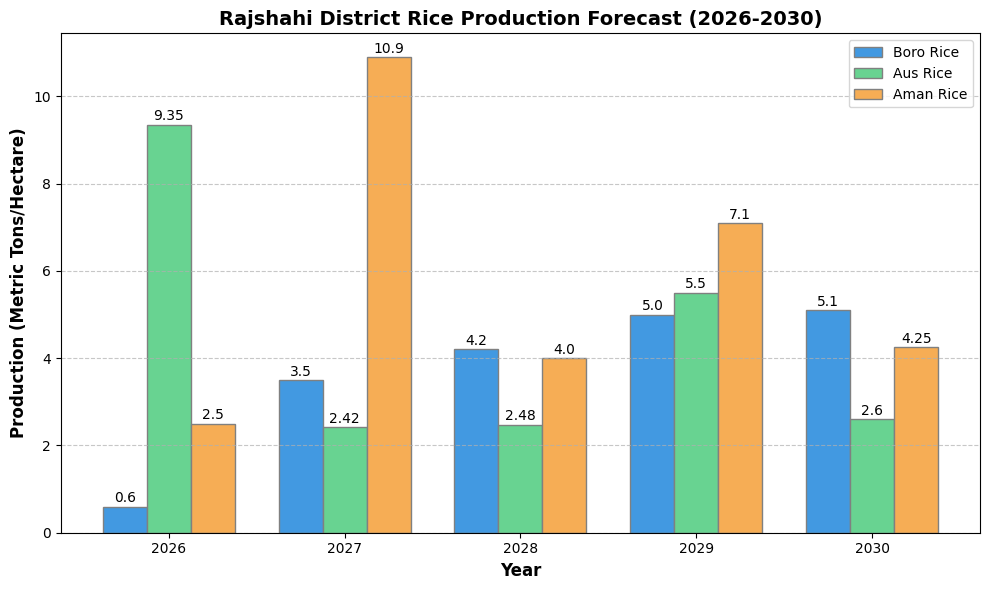

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['2026', '2027', '2028', '2029', '2030']
boro = [0.6, 3.5, 4.2, 5.0, 5.1]
aus = [9.35, 2.42, 2.48, 5.5, 2.6]
aman = [2.5, 10.9, 4.0, 7.1, 4.25]

# Bar width and positions
bar_width = 0.25
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(r1, boro, color='#4299e1', width=bar_width, edgecolor='grey', label='Boro Rice')
plt.bar(r2, aus, color='#68d391', width=bar_width, edgecolor='grey', label='Aus Rice')
plt.bar(r3, aman, color='#f6ad55', width=bar_width, edgecolor='grey', label='Aman Rice')

# Add labels and title
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Production (Metric Tons/Hectare)', fontweight='bold', fontsize=12)
plt.title('Rajshahi District Rice Production Forecast (2026-2030)', fontsize=14, fontweight='bold')
plt.xticks([r + bar_width for r in range(len(years))], years)

# Add legend
plt.legend()

# Add value labels above bars
for x, y in zip(r1, boro):
    plt.text(x, y + 0.1, f'{y}', ha='center', fontsize=10)
for x, y in zip(r2, aus):
    plt.text(x, y + 0.1, f'{y}', ha='center', fontsize=10)
for x, y in zip(r3, aman):
    plt.text(x, y + 0.1, f'{y}', ha='center', fontsize=10)

# Show grid and plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

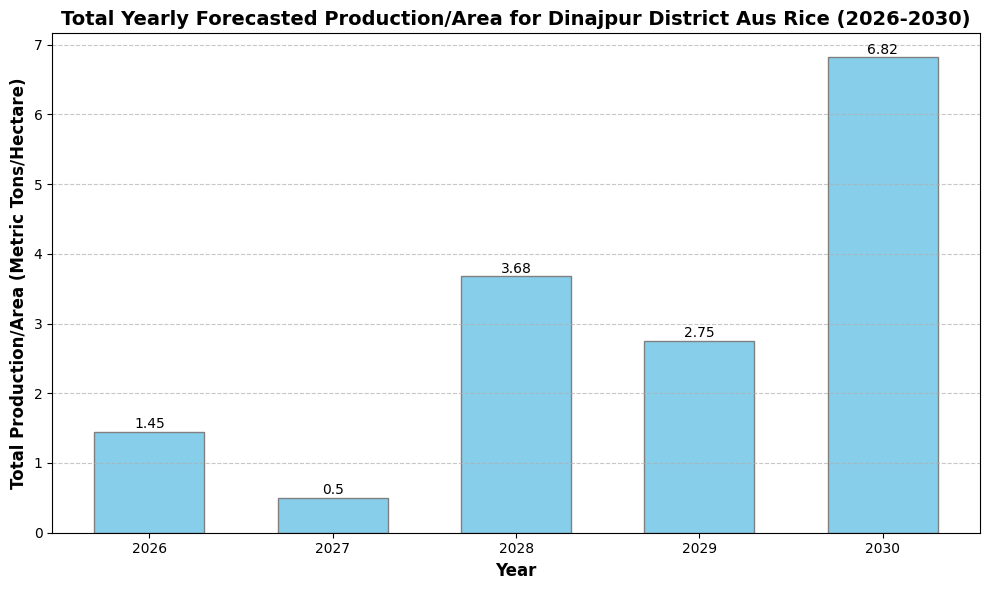

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['2026', '2027', '2028', '2029', '2030']
production = [1.45, 0.5, 3.68, 2.75, 6.82]

# Plot
plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(years))
bar_width = 0.6

# Create bar chart
plt.bar(bar_positions, production, color='#87CEEB', width=bar_width, edgecolor='grey', label='Production')

# Add labels, title, and grid
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Total Production/Area (Metric Tons/Hectare)', fontweight='bold', fontsize=12)
plt.title('Total Yearly Forecasted Production/Area for Dinajpur District Aus Rice (2026-2030)', fontsize=14, fontweight='bold')
plt.xticks(bar_positions, years)

# Add value annotations
for i, value in enumerate(production):
    plt.text(bar_positions[i], value + 0.05, f'{value}', ha='center', fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
